In [1]:
import numpy as np
import pandas as pd
import dateutil
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df["lastParticipationDate"] = pd.to_datetime(churn_df["lastParticipationDate"]).dt.normalize()

# comments_clean_anonymized.csv
cca_df = pd.read_csv("./data/comments_clean_anonymized.csv")
cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
cca_df.head()

# votes
votes_df = pd.read_csv("./data/votes.csv")
votes_df["voteDate"] = pd.to_datetime(votes_df["voteDate"]).dt.normalize()
votes_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,2016-02-01,4
1,33,56aec740f1ef260003e307d6,2016-02-01,4
2,79,56aec740f1ef260003e307d6,2016-02-01,4
3,94,56aec740f1ef260003e307d6,2016-02-01,4
4,16,56aec740f1ef260003e307d6,2016-02-01,2


In [3]:
firstVoteDate = votes_df.groupby(["employee", "companyAlias"]).agg({"voteDate": "min"}).reset_index()
firstVoteDate.rename(columns={"voteDate": "firstVoteDate"}, inplace=True)
firstVoteDate

,employee,companyAlias,firstVoteDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25
...,...,...,...
4372,991,54e52607e4b01191dc064966,2016-09-21
4373,995,54e52607e4b01191dc064966,2016-09-01
4374,996,54e52607e4b01191dc064966,2016-09-05
4375,997,54e52607e4b01191dc064966,2016-11-14


In [4]:
firstCommentDate = cca_df.groupby(["employee", 
                                   "companyAlias"]).agg({"commentDate": "min"}).reset_index()
firstCommentDate.rename(columns={"commentDate": "firstCommentDate"}, inplace=True)
firstCommentDate

,employee,companyAlias,firstCommentDate
0,-217,54e52607e4b01191dc064966,2015-02-26
1,-216,54e52607e4b01191dc064966,2015-02-25
2,-214,54e52607e4b01191dc064966,2015-03-06
3,-213,54e52607e4b01191dc064966,2015-03-09
4,-212,54e52607e4b01191dc064966,2015-03-10
...,...,...,...
3214,968,54e52607e4b01191dc064966,2016-09-13
3215,969,54e52607e4b01191dc064966,2016-10-10
3216,970,54e52607e4b01191dc064966,2016-09-13
3217,996,54e52607e4b01191dc064966,2016-09-05


In [5]:
# firstActiveDate = earlier of (firstVoteDate, firstCommentDate)
firstDates = pd.merge(firstVoteDate, firstCommentDate, on=["employee", "companyAlias"], how="outer")
firstDates["firstActiveDate"] = firstDates[['firstVoteDate','firstCommentDate']].min(axis=1)
firstDates

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25
...,...,...,...,...,...
4710,-2,57c4aa7dbb8b5c000396fd3b,NaT,2016-09-21,2016-09-21
4711,-2,57d1eb86a22c9d0003dd1f05,NaT,2016-09-12,2016-09-12
4712,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22
4713,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01


In [6]:
# Setting one time period = 30 days
timePeriod = 30

In [7]:
# Merge first dates with the votes dataframe
votes_merge = pd.merge(firstDates, votes_df, on=["employee", "companyAlias"], how="inner")
votes_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,voteDate,vote
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-25,4
1,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-26,4
2,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-06,3
3,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-12,3
4,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-19,4
...,...,...,...,...,...,...,...
221227,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-21,3
221228,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-30,3
221229,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-03,3
221230,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-10,2


In [8]:
# Calculate the time period of each vote
votes_merge["period"] = np.ceil(((votes_merge["voteDate"] - 
                                  votes_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
votes_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,voteDate,vote,period
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-25,4,1.0
1,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2014-11-26,4,1.0
2,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-06,3,1.0
3,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-12,3,1.0
4,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,2015-02-19,4,1.0
...,...,...,...,...,...,...,...,...
221227,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-21,3,5.0
221228,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-01-30,3,5.0
221229,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-03,3,5.0
221230,999,54e52607e4b01191dc064966,2016-09-15,2016-09-27,2016-09-15,2017-02-10,2,5.0


In [9]:
# Merge first dates with the cca dataframe
cca_merge = pd.merge(firstDates, cca_df, on=["employee", "companyAlias"], how="inner")
cca_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,commentId,txt,likes,dislikes,commentDate
0,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,589d817d03f2e60004fff0f8,******************,6.0,1.0,2017-02-10
1,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587c9cc45a5d5d00047d3516,***********,3.0,3.0,2017-01-16
2,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587ae5e11ddb6800040be36c,*,0.0,3.0,2017-01-15
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587a5f0fc535230004ca0445,*,0.0,3.0,2017-01-14
4,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,5878d346e201b100044843dd,*,0.0,5.0,2017-01-13
...,...,...,...,...,...,...,...,...,...,...
82751,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,5847c05ef77d9e0004700393,**********************************************...,0.0,1.0,2016-12-07
82752,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,58413c460176d500049f939b,*********************************************,2.0,0.0,2016-12-02
82753,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,583fd0f779244000040dd4d6,*******************************,2.0,0.0,2016-12-01
82754,-2,58a728a0e75bda00042a3468,NaT,2017-03-03,2017-03-03,58b92e4746b59c00044ee4e3,**********************************************...,18.0,20.0,2017-03-03


In [10]:
# Calculate the time period of each vote
cca_merge["period"] = np.ceil(((cca_merge["commentDate"] - 
                                cca_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
cca_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,commentId,txt,likes,dislikes,commentDate,period
0,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,589d817d03f2e60004fff0f8,******************,6.0,1.0,2017-02-10,10.0
1,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587c9cc45a5d5d00047d3516,***********,3.0,3.0,2017-01-16,9.0
2,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587ae5e11ddb6800040be36c,*,0.0,3.0,2017-01-15,9.0
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,587a5f0fc535230004ca0445,*,0.0,3.0,2017-01-14,9.0
4,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,5878d346e201b100044843dd,*,0.0,5.0,2017-01-13,9.0
...,...,...,...,...,...,...,...,...,...,...,...
82751,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,5847c05ef77d9e0004700393,**********************************************...,0.0,1.0,2016-12-07,1.0
82752,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,58413c460176d500049f939b,*********************************************,2.0,0.0,2016-12-02,1.0
82753,-2,581b08041a0ef8000308aef6,NaT,2016-12-01,2016-12-01,583fd0f779244000040dd4d6,*******************************,2.0,0.0,2016-12-01,1.0
82754,-2,58a728a0e75bda00042a3468,NaT,2017-03-03,2017-03-03,58b92e4746b59c00044ee4e3,**********************************************...,18.0,20.0,2017-03-03,1.0


In [11]:
votes_snapshot = votes_merge.groupby(["employee", 
                                      "companyAlias",
                                      "firstActiveDate",
                                      "period"]).agg({"vote": ["mean", "count"]}).reset_index()

votes_snapshot.columns = ['_'.join(col).strip() if len(col[1]) > 0 else col[0] for col in votes_snapshot.columns.values]
votes_snapshot

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1
...,...,...,...,...,...,...
20458,999,54e52607e4b01191dc064966,2016-09-15,2.0,3.00,4
20459,999,54e52607e4b01191dc064966,2016-09-15,3.0,3.00,1
20460,999,54e52607e4b01191dc064966,2016-09-15,4.0,3.00,1
20461,999,54e52607e4b01191dc064966,2016-09-15,5.0,2.80,5


In [12]:
cca_merge['commentLen'] = cca_merge['txt'].str.len()
cca_snapshot = cca_merge.groupby(["employee", 
                                  "companyAlias",
                                  "firstActiveDate",
                                  "period"]).agg({"commentId": "count",
                                                  "likes": ["sum", "mean"],
                                                  "dislikes": ["sum", "mean"], 
                                                  "commentLen": "mean"
                                                 }).reset_index()
cca_snapshot.columns = ['_'.join(col).strip() if len(col[1]) > 0 
                        else col[0] for col in cca_snapshot.columns.values]
cca_snapshot

,employee,companyAlias,firstActiveDate,period,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
0,-217,54e52607e4b01191dc064966,2015-02-26,1.0,2,16.0,8.0,0.0,0.00,258.00
1,-216,54e52607e4b01191dc064966,2015-02-25,1.0,6,24.0,4.0,0.0,0.00,25.00
2,-214,54e52607e4b01191dc064966,2015-03-06,1.0,2,0.0,0.0,0.0,0.00,4.00
3,-213,54e52607e4b01191dc064966,2015-03-09,1.0,2,2.0,1.0,0.0,0.00,51.00
4,-212,54e52607e4b01191dc064966,2015-03-10,1.0,2,0.0,0.0,0.0,0.00,6.00
...,...,...,...,...,...,...,...,...,...,...
10593,970,54e52607e4b01191dc064966,2016-09-05,5.0,10,258.0,25.8,10.0,1.00,157.20
10594,970,54e52607e4b01191dc064966,2016-09-05,6.0,2,8.0,4.0,14.0,7.00,10.00
10595,996,54e52607e4b01191dc064966,2016-09-05,1.0,8,64.0,8.0,10.0,1.25,76.75
10596,996,54e52607e4b01191dc064966,2016-09-05,4.0,4,20.0,5.0,2.0,0.50,97.50


In [13]:
# Merge cca and votes snapshots
snapshot = pd.merge(votes_snapshot, cca_snapshot, 
                    on=["employee", "companyAlias", 
                        "firstActiveDate", "period"], 
                    how="outer")
snapshot.fillna(0, inplace=True)
snapshot

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,0.0,0.0,0.00,0.0,0.000000,0.00
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,0.0,0.0,0.00,0.0,0.000000,0.00
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,0.0,0.0,0.00,0.0,0.000000,0.00
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,0.0,0.0,0.00,0.0,0.000000,0.00
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,0.0,0.0,0.00,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
21225,118,54e52607e4b01191dc064966,2016-11-17,2.0,0.00,0.0,4.0,21.0,5.25,2.0,0.500000,53.75
21226,118,54e52607e4b01191dc064966,2016-11-17,3.0,0.00,0.0,1.0,12.0,12.00,0.0,0.000000,39.00
21227,118,54e52607e4b01191dc064966,2016-11-17,4.0,0.00,0.0,2.0,13.0,6.50,4.0,2.000000,48.50
21228,160,54e52607e4b01191dc064966,2016-12-22,3.0,0.00,0.0,3.0,12.0,4.00,23.0,7.666667,279.00


In [14]:
snapshot.describe()

,employee,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean
count,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000,21230.000000
mean,164.120301,5.162694,2.795525,10.420725,3.898022,26.791521,3.631734,4.952567,0.640899,49.933597
std,181.490350,4.655730,0.941508,8.993091,7.047834,61.961478,6.091765,16.183340,1.662855,93.727515
min,-217.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,2.000000,2.416667,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,7.000000,3.366667,17.000000,4.000000,26.000000,5.200000,2.000000,0.500000,66.500000
max,999.000000,26.000000,4.000000,54.000000,68.000000,1002.000000,64.000000,474.000000,33.000000,1989.733333


In [15]:
# TODO add labels
# Merge first dates with the churn dataframe
churn_merge = pd.merge(firstDates, churn_df, on=["employee", "companyAlias"], how="inner")
churn_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,numVotes,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2,2014-11-26,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,16,2016-06-08,False
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25,135,2016-09-29,False
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,257,2017-03-19,True
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25,2,2015-11-29,True
...,...,...,...,...,...,...,...,...
4710,-2,574c423856b6300003009953,NaT,2016-08-11,2016-08-11,0,2017-03-07,False
4711,-2,57ac8b23be7fe30003e656d0,NaT,2016-10-21,2016-10-21,0,2016-12-26,False
4712,-2,57bb2f0b3bae540003a8d453,NaT,2017-01-19,2017-01-19,0,2017-01-19,False
4713,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22,0,2016-12-31,False


In [16]:
# Calculate the time period of each vote
churn_merge["period"] = np.ceil(((churn_merge["lastParticipationDate"] - 
                                  churn_merge["firstActiveDate"]).dt.days + 1) / timePeriod)
churn_merge

,employee,companyAlias,firstVoteDate,firstCommentDate,firstActiveDate,numVotes,lastParticipationDate,stillExists,period
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,NaT,2014-11-25,2,2014-11-26,True,1.0
1,1,54d43612e4b0f6a40755d93e,2015-02-06,NaT,2015-02-06,16,2016-06-08,False,17.0
2,1,54e52607e4b01191dc064966,2015-03-25,NaT,2015-03-25,135,2016-09-29,False,19.0
3,1,5641f96713664c000332c8cd,2016-04-28,2016-05-12,2016-04-28,257,2017-03-19,True,11.0
4,1,56558cfd07a5de00030908fb,2015-11-25,2015-11-25,2015-11-25,2,2015-11-29,True,1.0
...,...,...,...,...,...,...,...,...,...
4710,-2,574c423856b6300003009953,NaT,2016-08-11,2016-08-11,0,2017-03-07,False,7.0
4711,-2,57ac8b23be7fe30003e656d0,NaT,2016-10-21,2016-10-21,0,2016-12-26,False,3.0
4712,-2,57bb2f0b3bae540003a8d453,NaT,2017-01-19,2017-01-19,0,2017-01-19,False,1.0
4713,-2,57dd2d6a4018d9000339ca43,NaT,2016-09-22,2016-09-22,0,2016-12-31,False,4.0


In [17]:
# Merge snapshots with labels
churn_merge.drop(labels=["firstVoteDate", "firstCommentDate", "numVotes"], axis=1, inplace=True)
df = pd.merge(snapshot, churn_merge, 
              on=["employee", "companyAlias", 
                  "firstActiveDate", "period"], 
              how="outer")
df

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-11-26,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-06-08,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21302,-6,54e52607e4b01191dc064966,2016-10-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-20,False
21303,-5,54e52607e4b01191dc064966,2016-10-19,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-20,False
21304,-5,574c423856b6300003009953,2016-08-29,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-11,False
21305,-5,57ac8b23be7fe30003e656d0,2016-10-07,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-23,False


In [18]:
df["stillExists"].fillna(True, inplace=True)
df.fillna(0, inplace=True)
df

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,dislikes_mean,commentLen_mean,lastParticipationDate,stillExists
0,1,5474b9cde4b0bf7614b2c66f,2014-11-25,1.0,4.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2014-11-26 00:00:00,True
1,1,54d43612e4b0f6a40755d93e,2015-02-06,1.0,3.20,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
2,1,54d43612e4b0f6a40755d93e,2015-02-06,15.0,2.50,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
3,1,54d43612e4b0f6a40755d93e,2015-02-06,16.0,3.25,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True
4,1,54d43612e4b0f6a40755d93e,2015-02-06,17.0,3.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-06-08 00:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21302,-6,54e52607e4b01191dc064966,2016-10-24,5.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-03-20 00:00:00,False
21303,-5,54e52607e4b01191dc064966,2016-10-19,6.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-03-20 00:00:00,False
21304,-5,574c423856b6300003009953,2016-08-29,3.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-11 00:00:00,False
21305,-5,57ac8b23be7fe30003e656d0,2016-10-07,2.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-11-23 00:00:00,False


In [19]:
# Compute more features

# likeability = # of likes / (# of likes + # of dislikes)
df["likeability"] = (df["likes_sum"] / (df["likes_sum"] + df["dislikes_sum"])).fillna(0)

# change in vote
df.sort_values(by=["employee", "companyAlias", "period"], inplace=True)
df_groupby = df.groupby(by=["employee", "companyAlias"])
vote_shift = df_groupby["vote_mean"].shift().fillna(0)
period_shift = df_groupby["period"].shift().fillna(0)
conditions = [df["period"] - period_shift == 1,
             df["period"] - period_shift != 1]
choices = [df["vote_mean"] - vote_shift, df["vote_mean"]]
df["vote_change"] = np.select(conditions, choices)

# frequency
df["likes_cumsum"] = df_groupby["likes_sum"].cumsum()
df["dislikes_cumsum"] = df_groupby["dislikes_sum"].cumsum()
df["vote_cumsum"] = df_groupby["vote_count"].cumsum()
df["comment_cumsum"] = df_groupby["commentId_count"].cumsum()

df["likes_freq"] = df["likes_cumsum"] / df["period"]
df["dislikes_freq"] = df["dislikes_cumsum"] / df["period"]
df["vote_freq"] = df["vote_cumsum"] / df["period"]
df["comment_freq"] = df["comment_cumsum"] / df["period"]

# deviation from the company-level average score
df["company_avg_vote"] = df.groupby(by=["companyAlias", "period"])["vote_mean"].transform("mean")
df["vote_mean_norm"] = df["vote_mean"] / df["company_avg_vote"]

df.head(20)

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,...,likes_cumsum,dislikes_cumsum,vote_cumsum,comment_cumsum,likes_freq,dislikes_freq,vote_freq,comment_freq,company_avg_vote,vote_mean_norm
20494,-217,54e52607e4b01191dc064966,2015-02-26,1.0,0.0,0.0,2.0,16.0,8.00,0.0,...,16.0,0.0,0.0,2.0,16.0,0.0,0.0,2.0,2.316730,0.0
20495,-216,54e52607e4b01191dc064966,2015-02-25,1.0,0.0,0.0,6.0,24.0,4.00,0.0,...,24.0,0.0,0.0,6.0,24.0,0.0,0.0,6.0,2.316730,0.0
20496,-214,54e52607e4b01191dc064966,2015-03-06,1.0,0.0,0.0,2.0,0.0,0.00,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.316730,0.0
20497,-213,54e52607e4b01191dc064966,2015-03-09,1.0,0.0,0.0,2.0,2.0,1.00,0.0,...,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.316730,0.0
20498,-212,54e52607e4b01191dc064966,2015-03-10,1.0,0.0,0.0,2.0,0.0,0.00,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.316730,0.0
20499,-211,54e52607e4b01191dc064966,2015-03-11,1.0,0.0,0.0,2.0,6.0,3.00,0.0,...,6.0,0.0,0.0,2.0,6.0,0.0,0.0,2.0,2.316730,0.0
20500,-210,54e52607e4b01191dc064966,2015-03-13,1.0,0.0,0.0,2.0,12.0,6.00,0.0,...,12.0,0.0,0.0,2.0,12.0,0.0,0.0,2.0,2.316730,0.0
20501,-209,54e52607e4b01191dc064966,2015-03-13,1.0,0.0,0.0,10.0,10.0,1.00,0.0,...,10.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,2.316730,0.0
20502,-208,54e52607e4b01191dc064966,2015-03-12,1.0,0.0,0.0,14.0,14.0,1.00,0.0,...,14.0,0.0,0.0,14.0,14.0,0.0,0.0,14.0,2.316730,0.0
20503,-207,54e52607e4b01191dc064966,2015-03-13,1.0,0.0,0.0,4.0,18.0,4.50,0.0,...,18.0,0.0,0.0,4.0,18.0,0.0,0.0,4.0,2.316730,0.0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.calibration import calibration_curve

# Train and test a single model and report its accuracy, roc, and auc
def runModel(model, x_train, y_train, x_test, y_test, model_name, 
             auc_fig, cal_fig):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # coef
    if isinstance(model, LogisticRegression):
        print("--- Logistic model coefs ---")
        coef_df=pd.DataFrame(model.coef_.T, 
                             index=x_test.columns.values.T)
        print(coef_df)
    # Accuracy
    score = metrics.accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name} is {score}.")

    # roc
    probs = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    
    ax_auc = auc_fig.gca()
    ax_auc.plot(fpr, tpr, label=model_name)
    ax_auc.plot([0, 1], [0, 1], linestyle='dashed', color='black')
    ax_auc.set_xlabel("False Positive Rate")
    ax_auc.set_ylabel("True Positive Rate")
    ax_auc.set_title("ROC Curve")
    ax_auc.legend()
    
    # Calibration curve
    ax_cal = cal_fig.gca()
    prob_true, prob_pred = calibration_curve(y_test, probs)
    ax_cal.plot(prob_true, prob_pred, label=model_name,
             marker='s', markersize=5)
    ax_cal.plot([0, 1], [0, 1], linestyle='dashed', color='black')
    ax_cal.set_title("Calibration Plot")
    ax_cal.set_ylabel("Fraction of positives")
    ax_cal.set_xlabel("Mean predicted probability")
    ax_cal.legend()
    
    # auc
    auc = metrics.roc_auc_score(y_test, probs)
    print ("AUC for {0} = {1:.3f}".format(model_name, 
                                          auc))
    return score, auc
    
def sweepParams(models, x_train, y_train, params, param_name, model_name):
    best_f1 = -1
    best_idx = -1
    for i in range(len(models)):
        avg_f1 = cross_val_score(models[i], x_train, y_train, cv=5, 
                                 scoring="f1").mean()
        best_idx = i if avg_f1 > best_f1 else best_idx
        best_f1 = max(avg_f1, best_f1)
    
    best_param = params[best_idx]
    best_model = models[best_idx]
    
    print(f"Best {param_name} for {model_name} is {best_param}, " +
          f"with an f1 score of {best_f1}")
    return best_model, best_f1

In [21]:
def create_res(features, model_name, f1, accuracy, auc):
    return {"Feature": ' '.join(features), 
            "Model": model_name, 
            "F1": f1,   
            "Accuracy": accuracy, 
            "AUC": auc}

# train and tune models using logistic regression, decision tree, and knn
def sweepModels(x_train, y_train, x_test, y_test, features):
    res_rows = []
    auc_fig = plt.figure(figsize=(8, 5))
    cal_fig = plt.figure(figsize=(8, 5))

    # Logistic regression
    C_list = [0.01, 0.03, 0.1, 0.3, 1, 3]
    lr_models = [LogisticRegression(C=i, max_iter=3000) for i in C_list]
    best_model, best_f1 = sweepParams(lr_models, x_train,
                                      y_train, C_list, "C", 
                                      "logistic regression model")
    model_name = f"logistic regression (c = {best_model.C})"
    accuracy, auc = runModel(best_model, x_train, y_train, x_test, 
                             y_test, model_name, auc_fig, cal_fig)
    
    res_rows.append(create_res(features, model_name, best_f1, accuracy, auc))

    # Decision Tree
    min_samples_leaf_list = [10, 30, 100, 300, 1000, 3000]
    dt_models = [DecisionTreeClassifier(min_samples_leaf=i) for i in min_samples_leaf_list]
    best_model, best_f1 = sweepParams(dt_models, x_train,
                                      y_train, min_samples_leaf_list, 
                                      "min_samples_leaf_list", "decision tree model")
    model_name = f"Decision Tree (min_samples_leaf = {best_model.min_samples_leaf})"
    accuracy, auc = runModel(best_model, x_train, y_train, x_test, 
                             y_test, model_name, auc_fig, cal_fig)
    
    res_rows.append(create_res(features, model_name, best_f1, accuracy, auc))

    # KNN
    n_neighbors_list = [3, 5, 30, 50, 300, 500]
    knn_models = [KNeighborsClassifier(n_neighbors=i) for i in n_neighbors_list]
    best_model, best_f1 = sweepParams(knn_models, x_train,
                                      y_train, n_neighbors_list, 
                                      "n_neighbors", "KNN model")
    model_name = f"KNN (n_neighbors = {best_model.n_neighbors})"
    accuracy, auc = runModel(best_model, x_train, y_train, x_test, 
                             y_test, model_name, auc_fig, cal_fig)
    res_rows.append(create_res(features, model_name, best_f1, accuracy, auc))
    return res_rows

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2)
x_train[x_train['stillExists'] == False]

,employee,companyAlias,firstActiveDate,period,vote_mean,vote_count,commentId_count,likes_sum,likes_mean,dislikes_sum,...,likes_cumsum,dislikes_cumsum,vote_cumsum,comment_cumsum,likes_freq,dislikes_freq,vote_freq,comment_freq,company_avg_vote,vote_mean_norm
16842,273,54e52607e4b01191dc064966,2015-03-19,4.0,2.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,4.0,0.0,0.000000,0.000000,1.000000,0.000000,2.282758,0.876133
6634,69,5370af43e4b0cff95558c12a,2016-09-12,5.0,3.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,12.0,0.0,0.000000,0.000000,2.400000,0.000000,2.756854,1.088197
5845,57,57908a2622881200033b34d7,2017-03-06,1.0,4.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,3.065005,1.305055
835,7,57908a2622881200033b34d7,2016-07-29,1.0,4.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000,0.000000,3.065005,1.305055
21288,-58,5370af43e4b0cff95558c12a,2016-10-07,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,16.0,2.0,0.0,4.0,8.000000,1.000000,0.000000,2.000000,2.278524,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19278,498,54e52607e4b01191dc064966,2015-09-01,7.0,4.0,1.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,9.0,0.0,0.000000,0.000000,1.285714,0.000000,2.425341,1.649252
21116,-7,5370af43e4b0cff95558c12a,2016-10-11,4.0,0.0,0.0,14.0,6.0,0.428571,0.0,...,22.0,0.0,0.0,36.0,5.500000,0.000000,0.000000,9.000000,2.342993,0.000000
16140,252,54e52607e4b01191dc064966,2015-04-20,15.0,2.0,2.0,0.0,0.0,0.000000,0.0,...,116.0,14.0,85.0,32.0,7.733333,0.933333,5.666667,2.133333,2.508393,0.797323
21020,-22,58a728a0e75bda00042a3468,2017-02-23,1.0,0.0,0.0,6.0,18.0,3.000000,76.0,...,18.0,76.0,0.0,6.0,18.000000,76.000000,0.000000,6.000000,2.520096,0.000000


In [23]:
target = "stillExists"
base_pred = ['period', 'vote_mean', 'vote_count', 'commentId_count', 
              'likes_sum', 'likes_mean', 'dislikes_sum','dislikes_mean', 
              'commentLen_mean', 'likeability']
cumsum_pred = ['likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 
                     'comment_cumsum']
freq_pred = ['likes_freq', 'dislikes_freq', 'vote_freq', 'comment_freq']
company_pred = ['vote_mean_norm']

res_df = pd.DataFrame(columns=["Feature", "Model", "F1", 
                               "Accuracy", "AUC"])

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability']
Best C for logistic regression model is 0.1, with an f1 score of 0.9746721132666611
--- Logistic model coefs ---
                        0
period           0.026605
vote_mean        0.611349
vote_count       0.141263
commentId_count  0.072621
likes_sum       -0.003050
likes_mean       0.032557
dislikes_sum    -0.004148
dislikes_mean   -0.034623
commentLen_mean  0.000896
likeability      0.550992
Test accuracy for logistic regression (c = 0.1) is 0.9533083059596433.
AUC for logistic regression (c = 0.1) = 0.830
Best min_samples_leaf_list for decision tree model is 30, with an f1 score of 0.9755131033052894
Test accuracy for Decision Tree (min_samples_leaf = 30) is 0.9589394650398874.
AUC for Decision Tree (min_samples_leaf = 30) = 0.847
Best n_neighbors for KNN model is 30, with an f1 score of 0.975435193382714

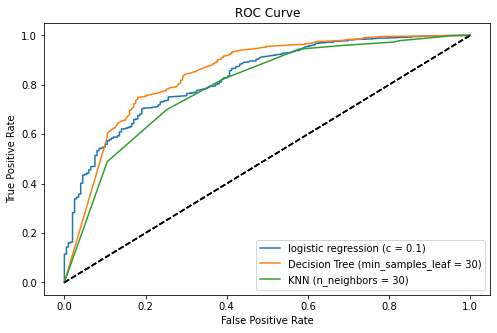

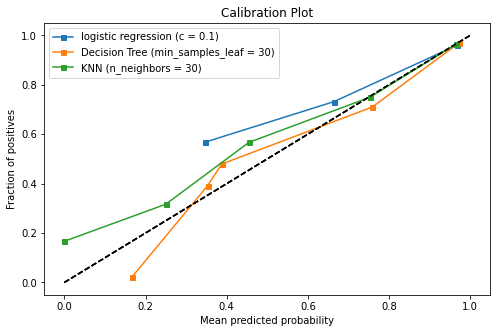

In [24]:
predictors = base_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base_pred")
res_df = res_df.append(res)

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 'comment_cumsum']
Best C for logistic regression model is 0.01, with an f1 score of 0.9746721137253509
--- Logistic model coefs ---
                        0
period           0.035031
vote_mean        0.550968
vote_count       0.154719
commentId_count  0.078854
likes_sum       -0.005454
likes_mean       0.048605
dislikes_sum     0.000428
dislikes_mean   -0.039584
commentLen_mean  0.000988
likeability      0.178677
likes_cumsum     0.000920
dislikes_cumsum -0.004256
vote_cumsum     -0.002842
comment_cumsum   0.004126
Test accuracy for logistic regression (c = 0.01) is 0.9530736743312999.
AUC for logistic regression (c = 0.01) = 0.832
Best min_samples_leaf_list for decision tree model is 30, with an f1 score of 0.9755680983295706
Test accuracy for Decision Tree (

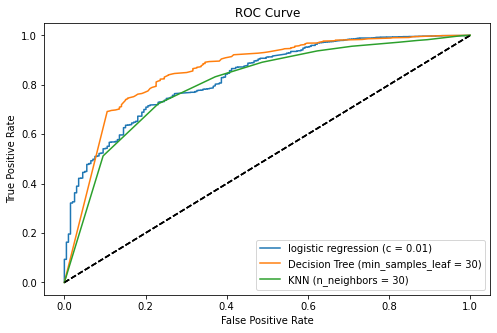

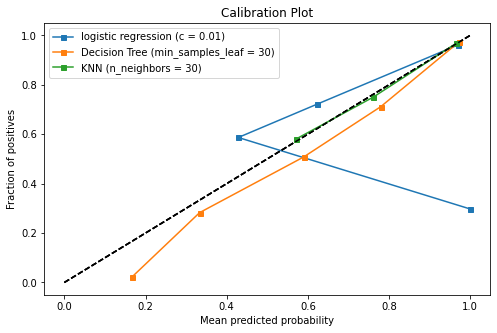

In [25]:
predictors += cumsum_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base + cumsum")
res_df = res_df.append(res)

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 'comment_cumsum', 'likes_freq', 'dislikes_freq', 'vote_freq', 'comment_freq']
Best C for logistic regression model is 3, with an f1 score of 0.9748096553020634
--- Logistic model coefs ---
                        0
period           0.066046
vote_mean        0.630083
vote_count       0.142416
commentId_count -0.018975
likes_sum       -0.004600
likes_mean       0.023159
dislikes_sum     0.016255
dislikes_mean   -0.034222
commentLen_mean  0.000632
likeability      0.733251
likes_cumsum     0.000625
dislikes_cumsum -0.000082
vote_cumsum     -0.004955
comment_cumsum  -0.009858
likes_freq       0.003210
dislikes_freq   -0.027077
vote_freq        0.024378
comment_freq     0.113237
Test accuracy for logistic regression (c = 3) is 0.9530736743312999.
AUC for logistic re

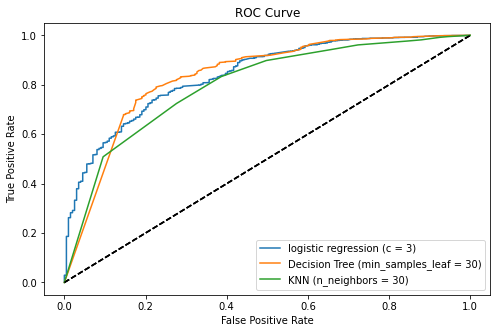

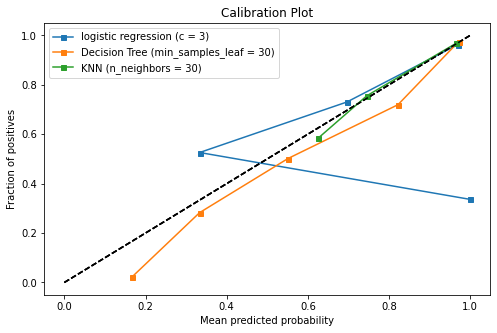

In [26]:
predictors += freq_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base + cumsum + freq")
res_df = res_df.append(res)

Running model on features:  ['period', 'vote_mean', 'vote_count', 'commentId_count', 'likes_sum', 'likes_mean', 'dislikes_sum', 'dislikes_mean', 'commentLen_mean', 'likeability', 'likes_cumsum', 'dislikes_cumsum', 'vote_cumsum', 'comment_cumsum', 'likes_freq', 'dislikes_freq', 'vote_freq', 'comment_freq', 'vote_mean_norm']
Best C for logistic regression model is 0.1, with an f1 score of 0.9747878893899771
--- Logistic model coefs ---
                        0
period           0.065650
vote_mean        1.388866
vote_count       0.150015
commentId_count -0.002648
likes_sum       -0.005566
likes_mean       0.033394
dislikes_sum     0.015191
dislikes_mean   -0.039115
commentLen_mean  0.000630
likeability      0.511891
likes_cumsum     0.000555
dislikes_cumsum -0.000309
vote_cumsum     -0.004878
comment_cumsum  -0.008271
likes_freq       0.004058
dislikes_freq   -0.026436
vote_freq        0.018806
comment_freq     0.094970
vote_mean_norm  -2.178950
Test accuracy for logistic regression (c =

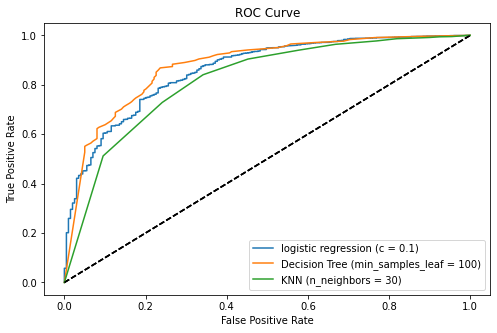

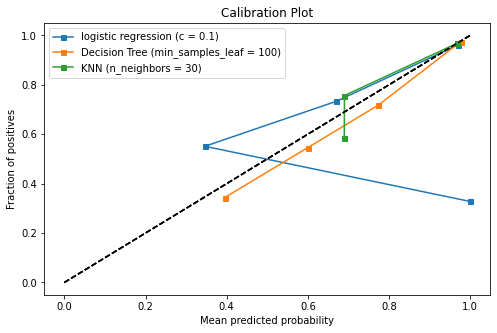

In [27]:
predictors += company_pred
print("Running model on features: ", predictors)
res = sweepModels(x_train[predictors], x_train[target], x_test[predictors], 
                  x_test[target], "base + cumsum + freq + company")
res_df = res_df.append(res)

In [28]:
res_df

,Feature,Model,F1,Accuracy,AUC
0,b a s e _ p r e d,logistic regression (c = 0.1),0.974672,0.953308,0.829886
1,b a s e _ p r e d,Decision Tree (min_samples_leaf = 30),0.975513,0.958939,0.847465
2,b a s e _ p r e d,KNN (n_neighbors = 30),0.975435,0.954481,0.794409
0,b a s e + c u m s u m,logistic regression (c = 0.01),0.974672,0.953074,0.831924
1,b a s e + c u m s u m,Decision Tree (min_samples_leaf = 30),0.975568,0.954716,0.858848
2,b a s e + c u m s u m,KNN (n_neighbors = 30),0.974644,0.953308,0.807058
0,b a s e + c u m s u m + f r e q,logistic regression (c = 3),0.974810,0.953074,0.839430
1,b a s e + c u m s u m + f r e q,Decision Tree (min_samples_leaf = 30),0.975335,0.954716,0.834624
2,b a s e + c u m s u m + f r e q,KNN (n_neighbors = 30),0.974644,0.953308,0.798879
0,b a s e + c u m s u m + f r e q + ...,logistic regression (c = 0.1),0.974788,0.953074,0.859220
